# 기본적인 사항들..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Q준비) train.csv 파일을 불러오세요 -> train_data 변수로 불러오시면 됩니다.<br>
test.csv 파일도 test 변수로 불러오세요.

In [339]:
train_data = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

Q1) 데이터 정리<br>
1-1) Train 데이터에서 Target인 Survived 컬럼을 추출해서,  y_train_data으로, 남은 특징만을 x_train_data 변수로 정리하기<br>
1-2) train_test_split을 활용을 x_train_data/y_train_data 를 x_train, y_train을 x_train, x_val, y_train, y_val으로 분리하기(조건 : test비율 0.2, y_train_data의 비율을 유지해서 나눌 것, random_state=1234로 고정)

In [340]:
y_train_data = train_data.loc[:, "Survived"]
x_train_data = train_data.drop("Survived", axis = 1)

In [237]:
from sklearn.model_selection import train_test_split

In [341]:
x_train, x_val, y_train, y_val = train_test_split(x_train_data,
                                                   y_train_data,
                                                   test_size=0.2,
                                                  stratify= y_train_data,
                                                 random_state=1234)

* Q2) 위에서 불러온 데이터의 기본적인 사항 체크를 하고, 각 컬럼별로 어느 정도 빈 데이터가 있는지 확인하세요!!

In [263]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## 전처리 부분들에 대해서 함수화를 해보자!!! -> 단, 주의하실 부분은 Train데이터를 기준으로 그대로 Test  데이터에 적용할 것!!! 혹 test에서 unseen 데이터가 발생할 경우도 고려해서 코드 작성할 것.

* Q3) 누락된 데이터를 처리하는 함수를 만드세요.단, 아래의 조건대로 만들어 보세요<br>
3-1) Age 컬럼이 누락이 된 것들은 `중앙값`으로 채우세요<br>
3-2) Cabin의 경우에는 `N`의 문자값으로 채우세요<br>
3-3) Embarked의 경우에는 `X`의 문자값으로 채우세요<br>
3-4) Fare의 경우에는 성별로 동일한 그룹에 대해서 평균값으로 채우세요. (예 : 남성에 대한 요금 데이터가 100,200이고, 남성인데 요금이 없는 사람은 150으로 채우고, 여성의 요금 데이터가 100,200,300이면 여성 중에서 요금이 없는 사람은 200으로 채워야 함 -> 즉, 유사한 데이터를 기반으로 채운다.)

In [342]:
x_train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [343]:
x_train_data['Age'].fillna(x_train_data['Age'].median(),inplace=True)

x_val['Age'].fillna(x_val['Age'].median(),inplace=True)

test['Age'].fillna(test['Age'].median(),inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [344]:
x_train_data['Cabin'].fillna("N",inplace=True)

test['Cabin'].fillna("N",inplace=True)

x_val['Cabin'].fillna("N",inplace=True)


In [270]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [345]:
x_train_data['Embarked'].fillna("X",inplace=True)

test['Embarked'].fillna("X",inplace=True)

x_val['Embarked'].fillna("X",inplace=True)


In [346]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [347]:
x_train_data["old_Fare"] = x_train_data["Fare"]

x_val["old_Fare"] = x_val["Fare"]

<ipython-input-347-199d598a05d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val["old_Fare"] = x_val["Fare"]


In [348]:
ref_table = x_train_data.groupby(by = "Sex")["Fare"].agg(np.mean)
ref_table

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [349]:
x_train_data["Fare"] = x_train_data.groupby(by="Sex")["Fare"].transform(lambda x : x.fillna(x.mean()))

x_val["Fare"] = x_val.groupby(by="Sex")["Fare"].transform(lambda x : x.fillna(x.mean()))


<ipython-input-349-fcd2dd1a6b1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val["Fare"] = x_val.groupby(by="Sex")["Fare"].transform(lambda x : x.fillna(x.mean()))


In [350]:
test["old_Fare"] = test["Fare"]
test = pd.merge(test,ref_table, how="left",left_on="Sex", right_on="Sex")

In [351]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare_x,Cabin,Embarked,old_Fare,Fare_y
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,N,Q,7.8292,25.523893
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,N,S,7.0000,44.479818
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,N,Q,9.6875,25.523893
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,N,S,8.6625,25.523893
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,N,S,12.2875,44.479818


In [352]:
test.loc[test["Fare_x"].isnull(),["Sex","Fare_x","old_Fare","Fare_y"]]

,Sex,Fare_x,old_Fare,Fare_y
152,male,NaN,NaN,25.523893


In [353]:
test.loc[test["Fare_x"].isnull(), "Fare_x"] = test.loc[test["Fare_x"].isnull(), "Fare_y"]

# LotFrontage_y 컬럼은 역할 종료 -> 제거
test.drop("Fare_y",axis=1, inplace=True)

# pd.merge를 하면서 동일 컬럼에 appendix가 부여된 것 처리
test.rename(columns={"Fare_x" : "Fare"}, inplace=True)


In [255]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_Fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,N,Q,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,N,S,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,N,Q,9.6875
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,N,S,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,N,S,12.2875


In [280]:
x_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  old_Fare     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


* Q4) 인코딩 처리 함수만드세요. 단, 아래의 조건대로 만들어 보세요! <br>
4-1) Name 컬럼에 있는 이름에 대해서는 ,가 있다면 ,맨 앞의 값을 활용하세요
(예 : Allen, Mr. William Henry --> Allen으로 값을 처리)<br>
4-2) Cabin 컬럼에 있는 값은 맨 앞의 문자만 사용하세요
(예 : C123 -> C) <br>
4-3) 라벨 인코딩 할 컬럼 : Cabin(단, 위의 조건 처리 4-2후),Name(단, 위의 조건 처리 4-1 후), Embarked <br>
4-4) 성별 Sex의 경우는 One hot Encoding 처리(이 데이터는 Unseen이 발생하지 않아서 House Price 처럼 따로 컬럼 정리할 부분은 필요가 없을 것임! 이 차이점을 기억하고, 늘 Unseen으로 Train, test의 변화를 숙지해야 함!!)

In [118]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [222]:
x_train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_Fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,8.0500


In [311]:
x_train_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [356]:
def encode_feature(df):
    # 인코딩 작업을 할 것임!!!!!
    features = ["Embarked"]
    
    for f in features:
        le = LabelEncoder()
        # f 컬럼에 대한 인코딩 기준 체크!!!!
        le.fit(df.loc[:,f]) # 컬럼 이름으로 df에 접근을 하는 loc 사용
        # 인코딩 기준을 바탕으로 숫자로 변환!!!-> df 업데이트까지...
        df.loc[:,f] = le.transform(df.loc[:,f])
   
    return df

In [357]:
encode_feature(x_train_data)
encode_feature(x_val)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_Fare
92,93,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,2,61.1750
552,553,3,"O'Brien, Mr. Timothy",male,28.0,0,0,330979,7.8292,N,1,7.8292
810,811,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,N,2,7.8875
29,30,3,"Todoroff, Mr. Lalio",male,28.0,0,0,349216,7.8958,N,2,7.8958
681,682,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,0,76.7292
...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,N,2,14.5000
540,541,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,2,71.0000
532,533,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,N,0,7.2292
817,818,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,N,0,37.0042


In [358]:
encode_feature(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_Fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,N,1,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,N,2,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,N,1,9.6875
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,N,2,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,N,2,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,N,2,8.0500
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,0,108.9000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,2,7.2500
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,N,2,8.0500


In [314]:
x_train_data[['Sex']]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [359]:
# 1단계 - 라벨인코딩
label_encoder = LabelEncoder() 
label_encoder.fit(x_train_data['Sex']) # 규칙을 정했으니
x_train_data['Sex'] = label_encoder.transform(x_train_data['Sex']) # 적용
x_train_data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [361]:
# 1단계 - 라벨인코딩
label_encoder = LabelEncoder() 
label_encoder.fit(x_val['Sex']) # 규칙을 정했으니
x_val['Sex'] = label_encoder.transform(x_val['Sex']) # 적용
x_val['Sex']

<ipython-input-361-bc52a0037919>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['Sex'] = label_encoder.transform(x_val['Sex']) # 적용


92     1
552    1
810    1
29     1
681    1
      ..
132    0
540    0
532    1
817    1
631    1
Name: Sex, Length: 179, dtype: int32

In [362]:
# 1단계 - 라벨인코딩
label_encoder = LabelEncoder() 
label_encoder.fit(test['Sex']) # 규칙을 정했으니
test['Sex'] = label_encoder.transform(test['Sex']) # 적용
test['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [288]:
x_train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_Fare
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,N,2,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,71.2833
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,N,2,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,53.1000
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,N,2,8.0500


* Q5) 불필요한 컬럼을 지우는 함수를 만드세요 : PassengerId, Ticket 컬럼 제거

In [363]:
def drop_features(df):
    df.drop(["PassengerId","Name", "Ticket","Cabin"], axis=1, inplace=True)
    return df

In [364]:
drop_features(x_train_data)
drop_features(x_val)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,old_Fare
92,1,1,46.0,1,0,61.1750,2,61.1750
552,3,1,28.0,0,0,7.8292,1,7.8292
810,3,1,26.0,0,0,7.8875,2,7.8875
29,3,1,28.0,0,0,7.8958,2,7.8958
681,1,1,27.0,0,0,76.7292,0,76.7292
...,...,...,...,...,...,...,...,...
132,3,0,47.0,1,0,14.5000,2,14.5000
540,1,0,36.0,0,2,71.0000,2,71.0000
532,3,1,17.0,1,1,7.2292,0,7.2292
817,2,1,31.0,1,1,37.0042,0,37.0042


In [365]:
drop_features(test)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,old_Fare
0,3,1,34.5,0,0,7.8292,1,7.8292
1,3,0,47.0,1,0,7.0000,2,7.0000
2,2,1,62.0,0,0,9.6875,1,9.6875
3,3,1,27.0,0,0,8.6625,2,8.6625
4,3,0,22.0,1,1,12.2875,2,12.2875
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2,8.0500
414,1,0,39.0,0,0,108.9000,0,108.9000
415,3,1,38.5,0,0,7.2500,2,7.2500
416,3,1,27.0,0,0,8.0500,2,8.0500


* Q6) 위의 Q3~Q5에 대해서 하나의 함수나 클래스를 만들어서 주어진 입력 데이터에 대해서 일괄 처리가 가능하도록 만드시고,x_train, x_val, test에 적용하여 변환을 동일한 기준으로 처리하세요!

* Q7) k-fold에서 repeated strify k-fold ( RepeatedStratifiedKFold ) 를 적용해서 3개로 나누고, random_state=1234, 반복은 4번으로 설정)

In [320]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [366]:
rskfold = RepeatedStratifiedKFold(n_splits=3,random_state=1234, n_repeats = 4)

In [367]:
# 하이퍼 파라미터 튜닝 -> gridsearch, randomgridsearch
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# cross-val
from sklearn.model_selection import cross_val_score
# 평가 -> 정확도
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [368]:
knn = KNeighborsClassifier(n_jobs=-1)

scores = cross_val_score(knn, x_train_data, y_train_data, cv=rskfold,scoring="accuracy")

for iter_count, acc in enumerate(scores):
    print("knn {0}째번 검증 정확도 : {1:.4f}".format(iter_count, acc))
print("knn의 str_kfold 평균 정확도 :", scores.mean())

knn 0째번 검증 정확도 : 0.6835
knn 1째번 검증 정확도 : 0.6869
knn 2째번 검증 정확도 : 0.6936
knn 3째번 검증 정확도 : 0.7374
knn 4째번 검증 정확도 : 0.6936
knn 5째번 검증 정확도 : 0.6566
knn 6째번 검증 정확도 : 0.7003
knn 7째번 검증 정확도 : 0.7071
knn 8째번 검증 정확도 : 0.6902
knn 9째번 검증 정확도 : 0.7071
knn 10째번 검증 정확도 : 0.6431
knn 11째번 검증 정확도 : 0.6902
knn의 str_kfold 평균 정확도 : 0.690796857463524


In [369]:
parameters ={
    "n_neighbors" : [1,3,5,7,9]
}

knn = KNeighborsClassifier(n_jobs=-1)

n_iter_search = 10

knn_rsk_rgs = RandomizedSearchCV(
    knn,
    param_distributions=parameters,
    cv = rskfold,  ####  변경!!!
    scoring="accuracy",
    n_jobs= -1, 
    random_state=1234,
    n_iter=n_iter_search,
    verbose=2
) 
knn_rsk_rgs.fit(x_train_data, y_train_data)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 12 folds for each of 5 candidates, totalling 60 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=3, random_state=1234),
                   estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 9]},
                   random_state=1234, scoring='accuracy', verbose=2)

In [370]:
knn_rsk_rgs.best_score_

0.7042648709315377

In [371]:
knn_rsk_rgs.best_params_

{'n_neighbors': 3}

In [372]:
knn_rsk_rgs_best = knn_rsk_rgs.best_estimator_
knn_rsk_rgs_ypred = knn_rsk_rgs_best.predict(x_val)
knn_rsk_rgs_acc = accuracy_score(y_val,knn_rsk_rgs_ypred)
print(knn_rsk_rgs_acc)

0.7821229050279329


* 모델 만들기 : 평가 기준 -> accuracy_score

* Q8) SVM모델에 대해서 <br>
1. 기본 파라미터에 대해서 cross_val_score을 통한(x_train, y_train, 앞에서 지정한 k-fold) 결과를 확인
2. RandomizedSearchCV, GridSearchCV를 수행하여 최적의 모델을 찾으세요<br>
3. 2번의 최적의 모델의 성능과 x_val,y_val에 대해서의 성능을 비교하세요

In [373]:
from sklearn.svm import SVC

In [381]:
# 일단 svm대략 어느 정도가 되는지 baseline 찾아보자
svm = SVC(max_iter=1000, random_state=1234)

scores = cross_val_score(
    svm,
    x_train_data,
    y_train_data,
    cv=rskfold,
    scoring="accuracy"
)
for iter_count, acc in enumerate(scores):
    print("SVC {0}째번 검증 정확도 : {1:.4f}".format(iter_count, acc))
print("SVC의 kfold 평균 정확도 :", scores.mean())

SVC 0째번 검증 정확도 : 0.7003
SVC 1째번 검증 정확도 : 0.6599
SVC 2째번 검증 정확도 : 0.6667
SVC 3째번 검증 정확도 : 0.6768
SVC 4째번 검증 정확도 : 0.6667
SVC 5째번 검증 정확도 : 0.6700
SVC 6째번 검증 정확도 : 0.6734
SVC 7째번 검증 정확도 : 0.6768
SVC 8째번 검증 정확도 : 0.6700
SVC 9째번 검증 정확도 : 0.6768
SVC 10째번 검증 정확도 : 0.6936
SVC 11째번 검증 정확도 : 0.6599
SVC의 kfold 평균 정확도 : 0.6742424242424242


In [375]:
svm = SVC(max_iter=1000, random_state=1234)

parameters = {
    "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 50,100],
    "kernel" : ["linear", "poly","rbf"],
    "gamma" : [0.001, 0.01, 0.1, 0.5],
    "degree" : [2,3,4,5,6,7]
}

n_iter_search = 10

svm_rsk_rgs = RandomizedSearchCV(
    svm,
    param_distributions=parameters,
    cv = rskfold,  ####  변경!!!
    scoring="accuracy",
    n_jobs= -1, 
    random_state=1234,
    n_iter=n_iter_search,
    verbose=3
) 
svm_rsk_rgs.fit(x_train_data, y_train_data)


Fitting 12 folds for each of 10 candidates, totalling 120 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=3, random_state=1234),
                   estimator=SVC(max_iter=1000, random_state=1234), n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              50, 100],
                                        'degree': [2, 3, 4, 5, 6, 7],
                                        'gamma': [0.001, 0.01, 0.1, 0.5],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=1234, scoring='accuracy', verbose=3)

In [376]:
svm_rsk_rgs.best_score_

0.7648709315375982

In [377]:
svm_rsk_rgs_best = svm_rsk_rgs.best_estimator_
svm_rsk_rgs_ypred = svm_rsk_rgs_best.predict(x_val)
svm_rsk_rgs_acc = accuracy_score(y_val,svm_rsk_rgs_ypred)
print(svm_rsk_rgs_acc)

0.7094972067039106


In [378]:
svm = SVC(max_iter=1000, random_state=1234)

parameters={
    "C" :[ 0.01, 0.02, 0.05, 0.015],
    "kernel":["linear", "rbf"],
    "gamma" : [0.001, 0.01, 0.1]
}

svm_rsk_gs = GridSearchCV(
    svm,
    param_grid=parameters,
    cv = rskfold,  ####  변경!!!
    scoring="accuracy",
    n_jobs= -1, 
    verbose=2
) 
svm_rsk_gs.fit(x_train_data, y_train_data)


Fitting 12 folds for each of 24 candidates, totalling 288 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=3, random_state=1234),
             estimator=SVC(max_iter=1000, random_state=1234), n_jobs=-1,
             param_grid={'C': [0.01, 0.02, 0.05, 0.015],
                         'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [379]:
svm_rsk_gs.best_score_

0.7648709315375982

In [380]:
svm_rsk_gs_best = svm_rsk_gs.best_estimator_
svm_rsk_gs_ypred = svm_rsk_gs_best.predict(x_val)
svm_rsk_gs_acc = accuracy_score(y_val,svm_rsk_gs_ypred)
print(svm_rsk_gs_acc)

0.7094972067039106


* Q10) RF 모델에 대해서 <br>
1. 기본 파라미터에 대해서 cross_val_score을 통한(x_train, y_train, 앞에서 지정한 k-fold) 결과를 확인
2. RandomizedSearchCV, GridSearchCV를 수행하여 최적의 모델을 찾으세요<br>
3. 2번의 최적의 모델의 성능과 x_val,y_val에 대해서의 성능을 비교하세요

In [382]:
from sklearn.ensemble import RandomForestClassifier

In [383]:
rf = RandomForestClassifier(n_jobs=-1,random_state=1234)

In [384]:
scores = cross_val_score(
    rf,
    x_train_data,
    y_train_data,
    cv=rskfold,
    scoring="accuracy"
)
for iter_count, acc in enumerate(scores):
    print("RF {0}째번 검증 정확도 : {1:.4f}".format(iter_count, acc))
print("RF의 kfold 평균 정확도 :", scores.mean())


RF 0째번 검증 정확도 : 0.8215
RF 1째번 검증 정확도 : 0.8013
RF 2째번 검증 정확도 : 0.8182
RF 3째번 검증 정확도 : 0.8215
RF 4째번 검증 정확도 : 0.8114
RF 5째번 검증 정확도 : 0.7912
RF 6째번 검증 정확도 : 0.8081
RF 7째번 검증 정확도 : 0.8384
RF 8째번 검증 정확도 : 0.8283
RF 9째번 검증 정확도 : 0.7879
RF 10째번 검증 정확도 : 0.8283
RF 11째번 검증 정확도 : 0.8047
RF의 kfold 평균 정확도 : 0.8134118967452301


In [385]:
rf = RandomForestClassifier(n_jobs=-1, random_state=1234)

parameters={
    "n_estimators" : [500, 200, 1000, 700],
    "max_features" : ["auto","sqrt"],
    "max_depth" : [8,9,10,11,12,20],
    "min_samples_split" : [2,3,4 ],
    "min_samples_leaf" : [2,3,4]
}

rf_rskf_rgs = RandomizedSearchCV(
    rf,
    param_distributions=parameters,
    cv = rskfold,  
    scoring="accuracy",
    n_jobs= -1, 
    verbose=2
) 
rf_rskf_rgs.fit(x_train_data, y_train_data)


Fitting 12 folds for each of 10 candidates, totalling 120 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=3, random_state=1234),
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=1234),
                   n_jobs=-1,
                   param_distributions={'max_depth': [8, 9, 10, 11, 12, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [500, 200, 1000, 700]},
                   scoring='accuracy', verbose=2)

In [387]:
rf_rskf_rgs.best_score_

0.8277216610549946

In [388]:
rf_rskf_rgs_best = rf_rskf_rgs.best_estimator_
rf_rskf_rgs_ypred = rf_rskf_rgs_best.predict(x_val)
rf_rskf_rgs_acc = accuracy_score(y_val,rf_rskf_rgs_ypred)
print(rf_rskf_rgs_acc)

0.888268156424581


In [399]:
rf = RandomForestClassifier(n_jobs=-1, random_state=1234)

parameters={
    "n_estimators" : [500,600, 700,800],
    "max_features" : ["auto","sqrt"],
    "max_depth" : [7,8,9,10,11],
    "min_samples_split" : [3,4,5 ],
    "min_samples_leaf" : [3,4,5]
}

rf_rskf_gs = GridSearchCV(
    rf,
    param_grid=parameters,
    cv = rskfold,  
    scoring="accuracy",
    n_jobs= -1, 
    verbose=2
) 
rf_rskf_gs.fit(x_train_data, y_train_data)


Fitting 12 folds for each of 360 candidates, totalling 4320 fits


KeyboardInterrupt: 

In [ ]:
rf_rskf_gs_best = rf_rskf_gs.best_estimator_
rf_rskf_gs_ypred = rf_rskf_gs_best.predict(x_val)
rf_rskf_gs_acc = accuracy_score(y_val,rf_rskf_gs_ypred)
print(rf_rskf_gs_acc)

* Q11) lightgbm 모델에 대해서 <br>
1. 기본 파라미터에 대해서 cross_val_score을 통한(x_train, y_train, 앞에서 지정한 k-fold) 결과를 확인
2. RandomizedSearchCV, GridSearchCV를 수행하여 최적의 모델을 찾으세요<br>
3. 2번의 최적의 모델의 성능과 x_val,y_val에 대해서의 성능을 비교하세요

In [389]:
from lightgbm import LGBMClassifier

In [390]:
lgbm = LGBMClassifier(
    random_state=1234,
    n_jobs = -1,
)

scores = cross_val_score(
    lgbm,
    x_train_data,
    y_train_data,
    cv=rskfold,
    scoring="accuracy"
)
for iter_count, acc in enumerate(scores):
    print("LGB {0}째번 검증 정확도 : {1:.4f}".format(iter_count, acc))
print("LGB의 kfold 평균 정확도 :", scores.mean())


LGB 0째번 검증 정확도 : 0.8182
LGB 1째번 검증 정확도 : 0.8114
LGB 2째번 검증 정확도 : 0.7980
LGB 3째번 검증 정확도 : 0.8418
LGB 4째번 검증 정확도 : 0.7946
LGB 5째번 검증 정확도 : 0.7946
LGB 6째번 검증 정확도 : 0.8283
LGB 7째번 검증 정확도 : 0.8384
LGB 8째번 검증 정확도 : 0.8148
LGB 9째번 검증 정확도 : 0.8148
LGB 10째번 검증 정확도 : 0.8350
LGB 11째번 검증 정확도 : 0.8114
LGB의 kfold 평균 정확도 : 0.8167789001122335


In [391]:
lgbm = LGBMClassifier(
    random_state=1234,
    n_jobs = -1,
)

parameters = {
    # 이어 달리기를 할 친구 스타일!!! -> tree -> overfit!!!!!
    "boosting_type":[ "gbdt", "goss","dart", "rf"],

    
    # 몇 명을 뽑아서 이어달리기를 할지,
    # 이어달리기를 하는 과정을 얼마나 디테일하게 할지...
    "n_estimators" : [10,50,100,300,500],
     "min_child_weight":[0.5, 1, 5],
    
    # 규약
    "reg_alpha" : [0,0.01, 0.01, 0.5, 1, 10, 0.0001],
    "reg_lambda" :  [0,0.01, 0.01, 0.5, 1, 10, 0.0001]
    
}

n_iter_search = 10

lgbm_rskf_rgs = RandomizedSearchCV(
    lgbm,
    param_distributions=parameters,
    cv = rskfold,  ####  변경!!!
    scoring="accuracy",
    n_jobs= -1, 
    random_state=1234,
    # n_iter = 시도되는 파라미터 설정 수(런타임과 솔루션 품질을 절충)
    n_iter=n_iter_search,
    verbose=3
) 

lgbm_rskf_rgs.fit(x_train_data,y_train_data)


Fitting 12 folds for each of 10 candidates, totalling 120 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79685746 0.81734007 0.82744108 0.8047138         nan
 0.80415264 0.79545455 0.80387205 0.8134119 ]
  warnings.warn(


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=3, random_state=1234),
                   estimator=LGBMClassifier(random_state=1234), n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'goss',
                                                          'dart', 'rf'],
                                        'min_child_weight': [0.5, 1, 5],
                                        'n_estimators': [10, 50, 100, 300, 500],
                                        'reg_alpha': [0, 0.01, 0.01, 0.5, 1, 10,
                                                      0.0001],
                                        'reg_lambda': [0, 0.01, 0.01, 0.5, 1,
                                                       10, 0.0001]},
                   random_state=1234, scoring='accuracy', verbose=3)

In [392]:
lgbm_rskf_rgs.best_score_

0.8274410774410774

In [393]:
lgbm_rskf_rgs_best = lgbm_rskf_rgs.best_estimator_
lgbm_rskf_rgs_ypred = lgbm_rskf_rgs_best.predict(x_val)
lgbm_rskf_rgs_acc = accuracy_score(y_val,lgbm_rskf_rgs_ypred)
print(lgbm_rskf_rgs_acc)

0.8994413407821229


In [ ]:
lgbm = LGBMClassifier(
    random_state=1234,
    n_jobs = -1,
)

parameters = {
    # 이어 달리기를 할 친구 스타일!!! -> tree -> overfit!!!!!
    "boosting_type":[ "gbdt", "goss","dart", "rf"],

    
    # 몇 명을 뽑아서 이어달리기를 할지,
    # 이어달리기를 하는 과정을 얼마나 디테일하게 할지...
    "n_estimators" : [10,50,100,300,500],
     "min_child_weight":[0.5, 1, 5],
    
    # 규약
    "reg_alpha" : [0,0.01, 0.01, 0.5, 1, 10, 0.0001],
    "reg_lambda" :  [0,0.01, 0.01, 0.5, 1, 10, 0.0001]
    
}

n_iter_search = 10

lgbm_rskf_gs = GridSearchCV(
    lgbm,
    param_distributions=parameters,
    cv = rskfold,  ####  변경!!!
    scoring="accuracy",
    n_jobs= -1, 
    random_state=1234,
    # n_iter = 시도되는 파라미터 설정 수(런타임과 솔루션 품질을 절충)
    n_iter=n_iter_search,
    verbose=3
) 

lgbm_rskf_gs.fit(x_train_data,y_train_data)


In [ ]:
lgbm_rskf_gs_best = lgbm_rskf_gs.best_estimator_
lgbm_rskf_gs_ypred = lgbm_rskf_gs_best.predict(x_val)
lgbm_rskf_gs_acc = accuracy_score(y_val,lgbm_rskf_gs_ypred)
print(lgbm_rskf_gs_acc)

* Q12) xgboost 모델에 대해서 <br>
1. 기본 파라미터에 대해서 cross_val_score을 통한(x_train, y_train, 앞에서 지정한 k-fold) 결과를 확인
2. RandomizedSearchCV, GridSearchCV를 수행하여 최적의 모델을 찾으세요<br>
3. 2번의 최적의 모델의 성능과 x_val,y_val에 대해서의 성능을 비교하세요

In [394]:
from xgboost import XGBClassifier

In [395]:
xgbc = XGBClassifier(n_jobs = -1,
                    use_label_encoder=False,
                    eval_metric = "error",
                    objective = "binary:logistic",
                    random_state = 1234
                    )

for iter_count, acc in enumerate(scores):
    print("Xgboost {0}째번 검증 정확도 : {1:.4f}".format(iter_count, acc))
print("Xgboost의 kfold 평균 정확도 :", scores.mean())


Xgboost 0째번 검증 정확도 : 0.8182
Xgboost 1째번 검증 정확도 : 0.8114
Xgboost 2째번 검증 정확도 : 0.7980
Xgboost 3째번 검증 정확도 : 0.8418
Xgboost 4째번 검증 정확도 : 0.7946
Xgboost 5째번 검증 정확도 : 0.7946
Xgboost 6째번 검증 정확도 : 0.8283
Xgboost 7째번 검증 정확도 : 0.8384
Xgboost 8째번 검증 정확도 : 0.8148
Xgboost 9째번 검증 정확도 : 0.8148
Xgboost 10째번 검증 정확도 : 0.8350
Xgboost 11째번 검증 정확도 : 0.8114
Xgboost의 kfold 평균 정확도 : 0.8167789001122335


In [396]:
xgbc = XGBClassifier(n_jobs = -1,
                    use_label_encoder=False,
                    eval_metric = "error",
                    objective = "binary:logistic",
                    random_state = 1234
                    )
# xgboost : 에러 줄일때 사용
parameters = {
    "booster": ["gbtree","gblinear","dart"],#이어달리기 할 친구 스타일(tree base). 
    "n_estimators":[10,50,100,200,500], #이어달리기 몇명이서
    "learning_rate" : [0.1,0.3,0.8], # 숫자가 너무 작으면 섬세하게 봐서 시간 오래걸림
    
    # tree 모델이 가지고 있는 부분 조절 (tree베이스 이기 때문에 overfit 주의)
    "max_depth": [2,4,6,8,10,20],
    "min_child_weight":[0.5,1,5],
    "subsample": [0.3,0.5,0.7,0.9],
    "colsample_bytree": [0.3,0.5,0.7,0.9],
    
    # 규약
    "reg_alpha": [0,0.01,0.1,0.5,1,10,0.001],
    "reg_lambda": [0,0.01,0.1,0.5,1,10,0.001]
    
}


n_iter_search = 10

xgbc_rskf_rgs = RandomizedSearchCV(
    xgbc,
    param_distributions=parameters,
    cv = rskfold,  ####  변경!!!
    scoring="accuracy",
    n_jobs= -1, 
    random_state=1234,
    n_iter=n_iter_search,
    verbose = 3
)

# 데이터 타입을 사용하는 버전에 따라 수정이 필요할 수 있음.
# np를 사용해서 값만 집어넣어야 가능한 경우가 있음
xgbc_rskf_rgs.fit(x_train_data,y_train_data)



Fitting 12 folds for each of 10 candidates, totalling 120 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=4, n_splits=3, random_state=1234),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='error', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_dept...
                   param_distributions={'booster': ['gbtree', 'gblinear',
                                                    'dart'],
                                        'colsample_bytree': [0.3, 0.5, 0.7,
                                                         

In [397]:
xgbc_rskf_rgs.best_score_

0.8229517396184062

In [398]:
xgbc_rskf_rgs_best = xgbc_rskf_rgs.best_estimator_
xgbc_rskf_rgs_ypred = xgbc_rskf_rgs_best.predict(x_val)
xgbc_rskf_rgs_acc = accuracy_score(y_val,xgbc_rskf_rgs_ypred)
print(xgbc_rskf_rgs_acc)

0.88268156424581


In [ ]:
xgbc = XGBClassifier(n_jobs=-1,
                    use_label_encoder=False,
                    eval_metric ="error",
                    objective = "binary:logistic",
                    random_state = 1234,
                    verbosity=3)

parameters = {
    # 이어 달리기를 할 친구 스타일!!! -> tree -> overfit!!!!!
    "booster":[ "gbtree", "gblinear","dart"],
    
    # 몇 명을 뽑아서 이어달리기를 할지,
    # 이어달리기를 하는 과정을 얼마나 디테일하게 할지...
    "n_estimators" : [100,200],
    "learning_rate" : [0.1 ,0.2],
    
    # tree 모델이 가지고 있는 부분을 조절!!!!!!!
    "max_depth":[5,6,7],
    "min_child_weight":[ 0.4, 0.5, 0.6],
    "subsample":[0.6, 0.65,0.7,0.75],
    "colsample_bytree":[0.9, 0.91, 0.89,],
    
    # 규약
    "reg_alpha" : [0,1, 0.9, 1, 1.2],
    "reg_lambda" :  [0,0.5,0.45, 0.55]
    
}

xgbc_rskf_gs = GridSearchCV(
    xgbc,
    param_grid=parameters,
    cv = rskfold,  ####  변경!!!
    scoring="accuracy",
    n_jobs= -1, 
    verbose=3
) 
xgbc_rskf_gs.fit(x_train_data, y_train_data)

In [ ]:
xgbc_rskf_gs_best = xgbc_rskf_gs.best_estimator_
xgbc_rskf_gs_ypred = xgbc_rskf_gs_best.predict(x_val)
xgbc_rskf_gs_acc = accuracy_score(y_val,xgbc_rskf_gs_ypred)
print(xgbc_rskf_gs_acc)

* Q13) Voting 모델을 만들어 보세요( 가중치나 모델 수는 개인 자유).<br>
- voting 모델의 성능과 x_val, y_val에 대해서 성능을 비교하세요.

In [400]:
from sklearn.ensemble import VotingClassifier

In [401]:
ensemble_clf_soft = VotingClassifier(
    estimators=[ ("rf",rf_rskf_rgs_best), ("lgbm",lgbm_rskf_rgs_best), ("xg",xgbc_rskf_rgs_best) ], 
    voting="hard",
)

ensemble_clf_soft.fit(x_train_data,y_train_data)
ensemble_clf_soft_pred = ensemble_clf_soft.predict(x_val)
print("3 models Voting Results :", accuracy_score(y_val,ensemble_clf_soft_pred ))


3 models Voting Results : 0.88268156424581


* Q14) 지금까지 만드신 모델을 바탕으로 보팅이나 여러가지 방법으로 최종 모델을 선정하시고, x_test에 대해서 적용해서 kaggle에 직접 업로드를 하시고, 그 중 제일 좋은 모델과 성능을 캡쳐해서 노트북 파일에 첨부해주세요! (아래 코드를 참조하셔서 캡쳐하신 파일을 png로 하시고, 아래와 같이 캡쳐해서 올려주세요~)

In [ ]:
* 성능 가장 좋은거 lightgbm

In [408]:
lgbm_rskf_rgs_best = lgbm_rskf_rgs.best_estimator_
lgbm_rskf_rgs_ypred = lgbm_rskf_rgs_best.predict(x_val)
lgbm_rskf_rgs_acc = accuracy_score(y_val,lgbm_rskf_rgs_ypred)
print(lgbm_rskf_rgs_acc)

0.8994413407821229


In [409]:
ypred = lgbm_rskf_rgs_best.predict(test)


In [410]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [403]:
# kaggle제출 준비
test_temp = pd.read_csv("data/titanic_test.csv")
test_id = test_temp["PassengerId"]
test_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [411]:
my_submission = pd.DataFrame()
my_submission['PassengerId'] = test_id
my_submission['Survived'] = ypred
my_submission.to_csv('gender_submission.csv',index=False)


In [405]:
from IPython.display import Image

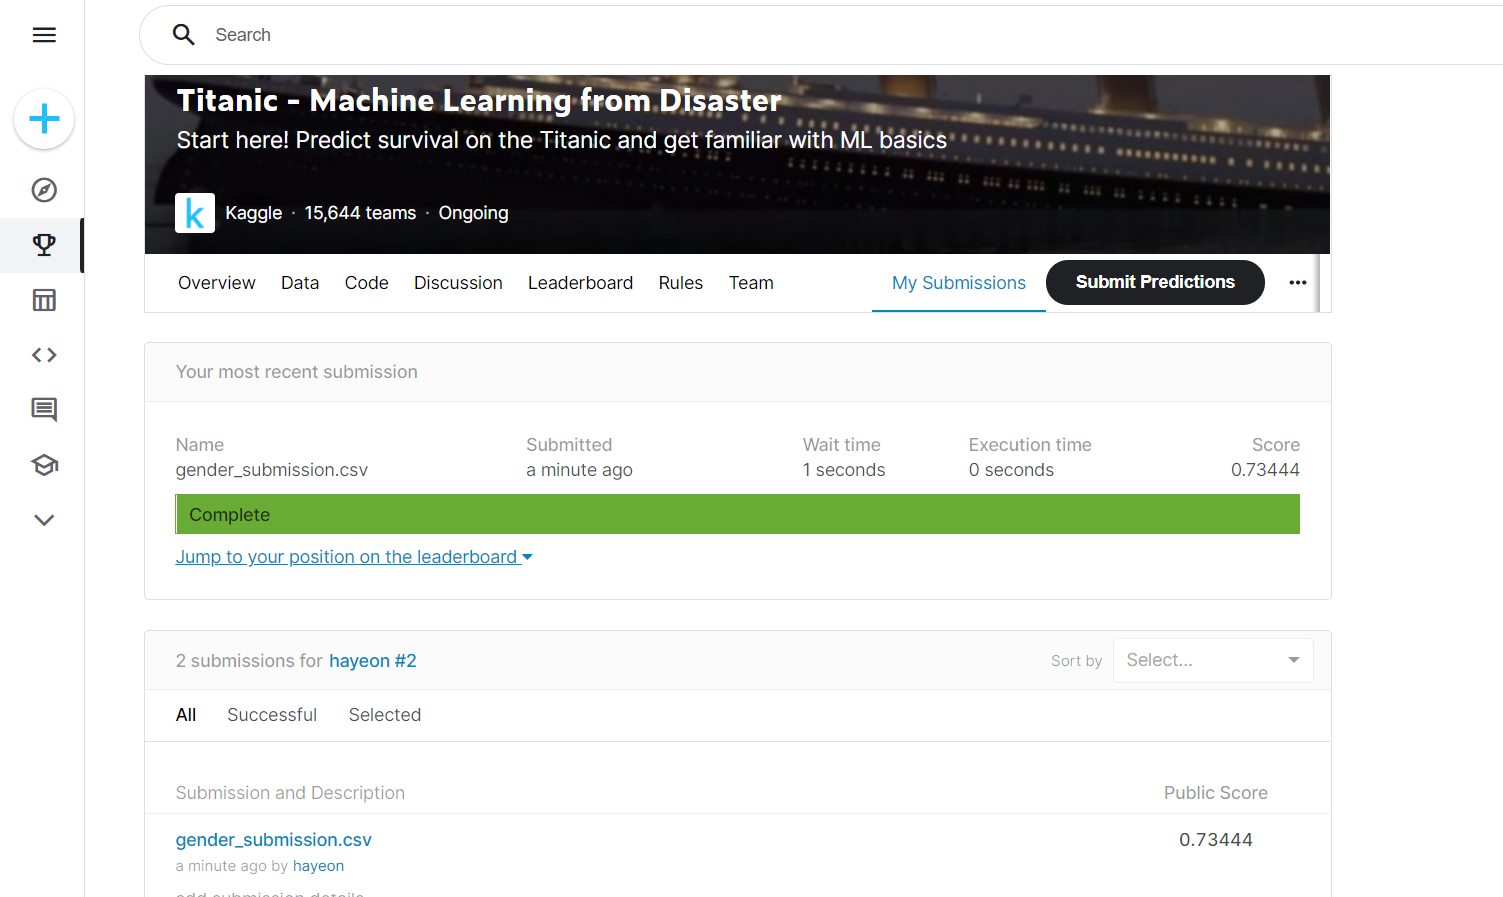

In [412]:
Image("kaggle.png")

Q15) RF, LightGBM, Xgboost 본인 모델의 주요한 변수들이 무엇들인지 중요도 순서대로 그래프로 보이고, 중요하다고 생각되는 변수들을 추려서 LightGBM 모델을 만드세요. 

Q16) 본인이 만든 기존의 LightGBM 모델과 중요하다고 생각되는 변수들을 선택해서 변수를 본인이 줄여서 한 LightGBM과의 모델의 성능을 비교하세요